<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Logistic_regression_predict_ad_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Use fake advertising data set and predict whether or not someone will click on the ad. 

## 1. Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/XiaonaZhou/data_analytics_2/main/Python/Unit_4/advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 2. Missing data 

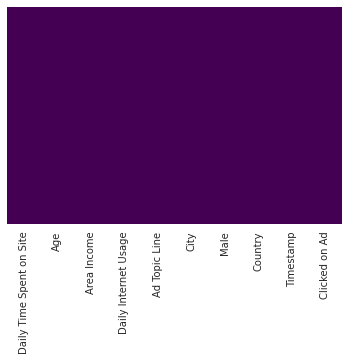

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

I don't see any yellow lines on the plot. That means there is no missing values in the data set. Check again with the following code.

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## 3. Exploratory data analysis


**How many people clicked on add? what is the proportion?**

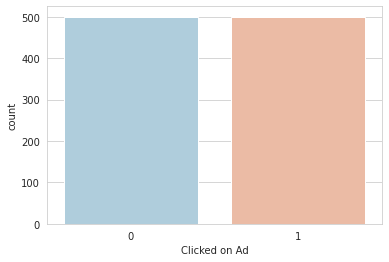

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=df, palette='RdBu_r')

There are 500 people clicked on ad, and 500 people did not click on ad.

**How did gender play a role in clicking ads?**

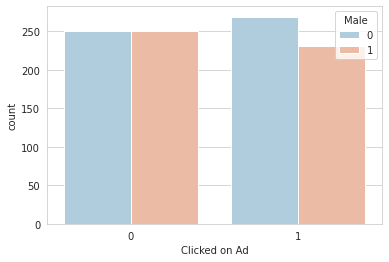

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue = 'Male',data=df, palette='RdBu_r')

There are more female clicking on ads than male.

**How did daily internet usage play a role in clicking ads?**

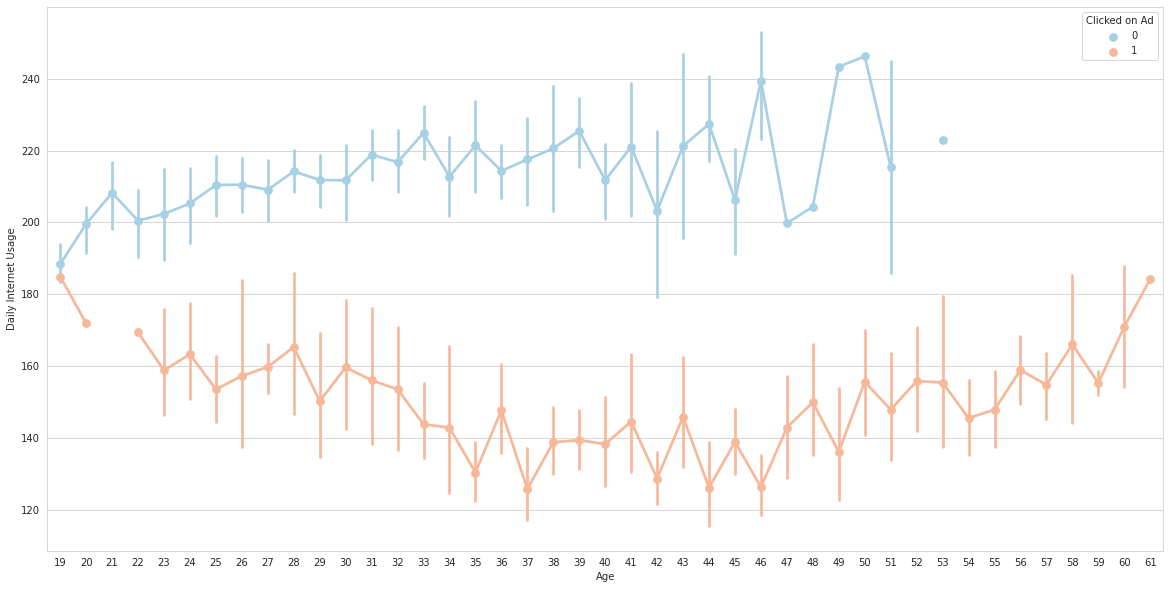

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Age', y = 'Daily Internet Usage', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

By looking at the graph above, we see that age seems to be unrelated to clicking ads. On the other hand, we observed that the longer someone uses internet, the less likely that he/she would click on ads.  

**How did daily time spend on site play a role in clicking ads?**

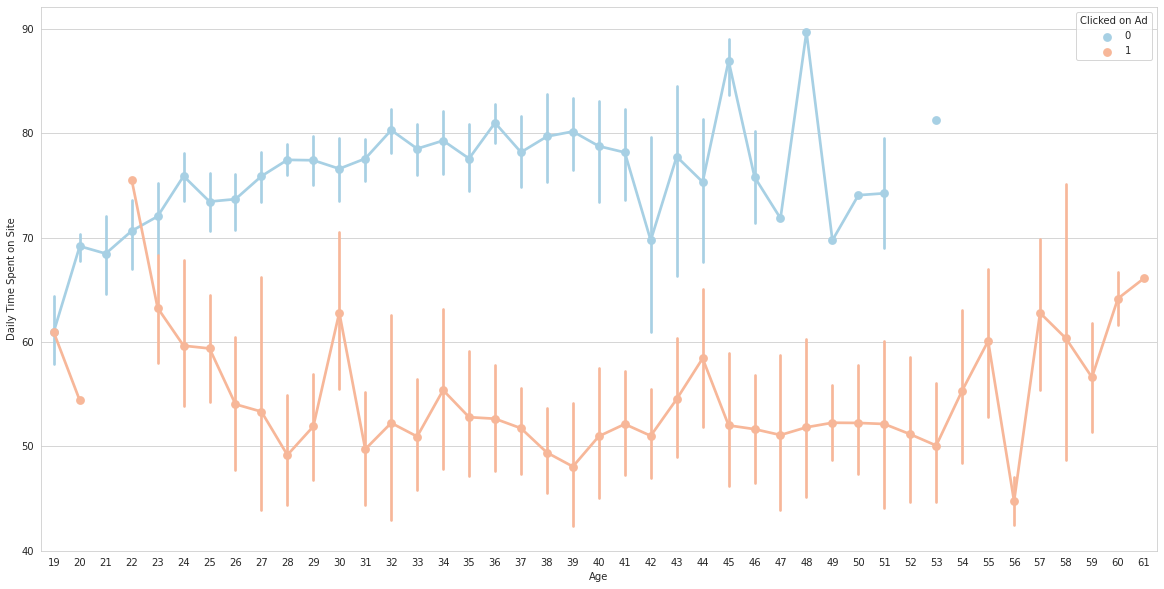

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Age', y = 'Daily Time Spent on Site', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

We see similar graph as daily usage internet, that is the longer someone spend on site, the less likely he/she would click on ads. 

**Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


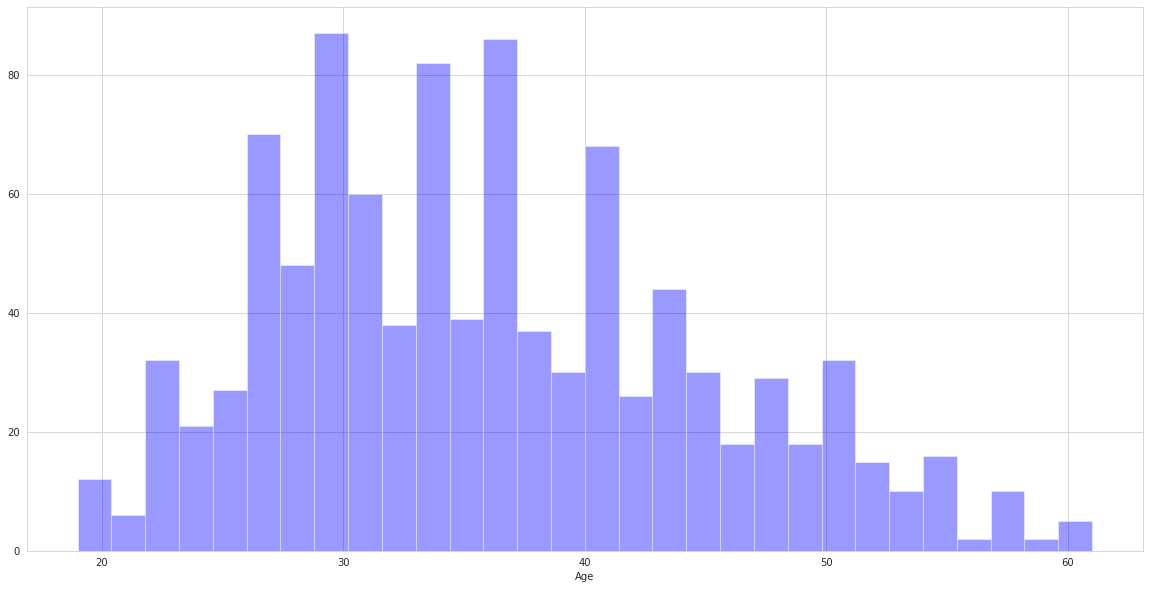

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['Age'], kde=False, color = 'blue', bins = 30)

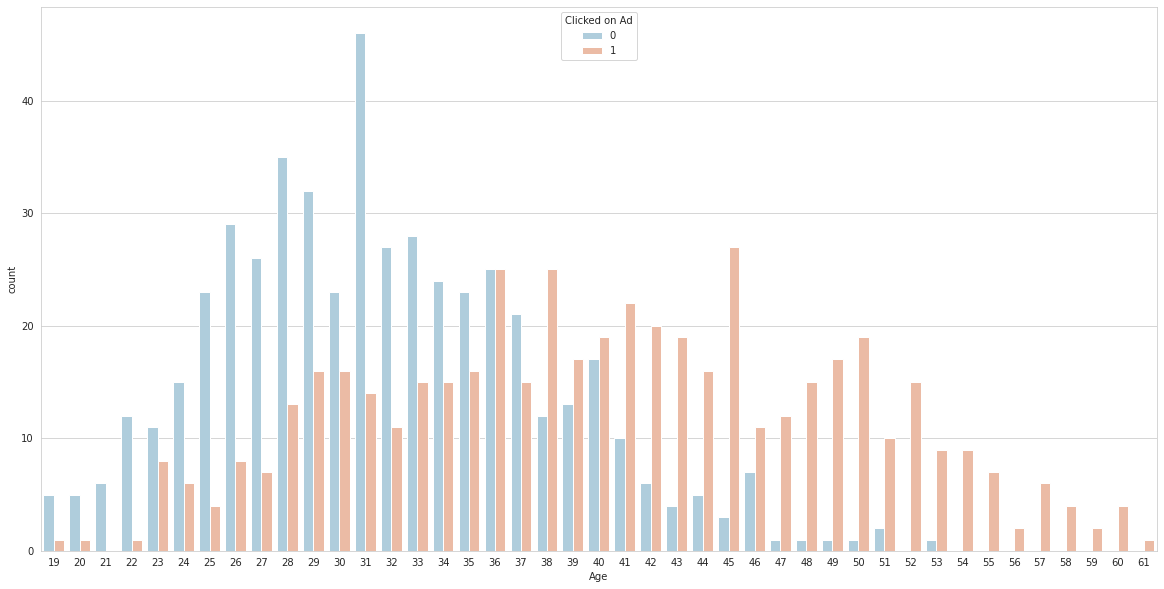

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

**Create a jointplot showing Area Income versus Age.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


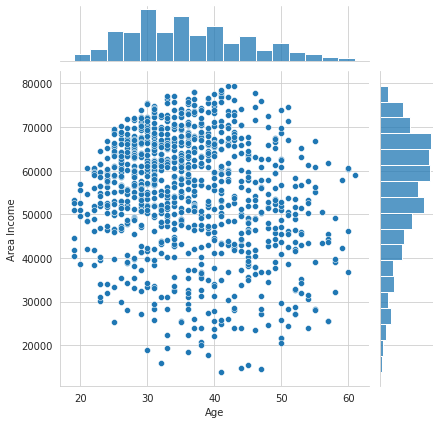

In [ ]:
sns.jointplot('Age','Area Income', data = df)

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


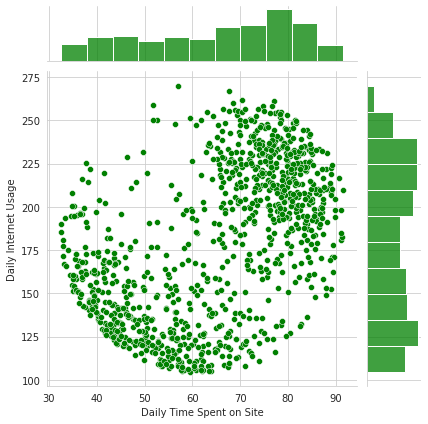

In [ ]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage', data = df, color = 'green')

## 4. Data Wrangling

remove all non-numeric variable.

In [ ]:
# remove Ad Topic Line, City, Country, and Timestamp
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1,inplace=True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Standardize the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Clicked on Ad', axis=1)) # standardize the dataset without the label. DO NOT standardize label
scaled_features = scaler.transform(df.drop('Clicked on Ad',axis=1)) # column names were removed after standardize
scaled_features
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # add back column names
df_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


# 5. Logistic Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_feat, df['Clicked on Ad'], test_size=0.30, random_state=0)

In [ ]:
from sklearn.linear_model import  LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       164
           1       0.96      0.96      0.96       136

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



**Interpretation of `classification_report`**:

1. The recall means percent of "caught" positive instance: $\frac{TP}{(TP+FN)}$. That is we found 97% of true value. In other words, we missed 3% of the true value.  

2. The precision will be "how many are correctly classified among that class": $\frac{TP}{TP+FP}$. That is among all the ones we classified as true, 97% was actually true. 

3. The f1-score is the harmonic mean between precision & recall. Check [harmonic mean](https://www.mathsisfun.com/numbers/harmonic-mean.html). 

4. The support is the number of occurence of the given class in your dataset (so you have 164 of class 0 and 136 of class 1, which is a really well balanced dataset.

5. precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

[source](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Text(0.5, 103.73999999999997, 'Predicted label')

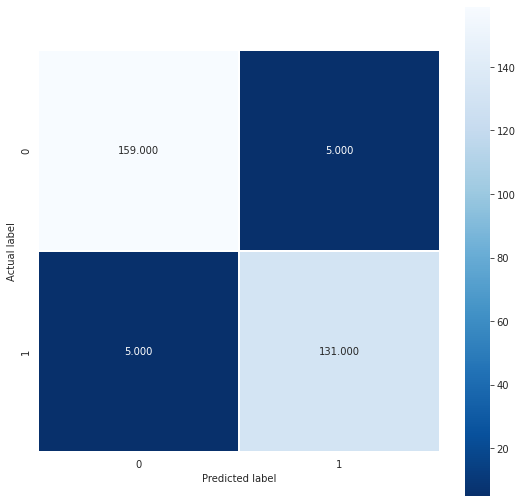

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

# Conclusion

From the report above, we see that the scores are around 0.97. That means we have a decent logistic model for predicting ad clicks. 